# Simple Pendulum Hamiltonian and Canonical Equations: Numerical Solution

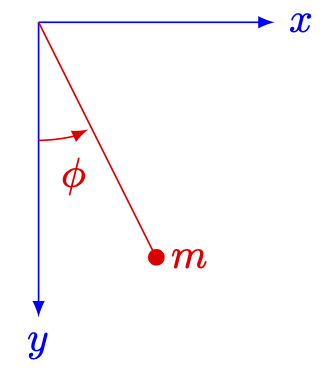

##Preamble

In [1]:
import sympy as sp

Symbolic variables

In [2]:
t,l,m,g=sp.symbols('t,l,m,g',positive=True)

Generalized coordinate

In [3]:
phi=sp.Function('phi')(t)

Cartesian Coordinates

In [4]:
x=l*sp.sin(phi)
y=l*sp.cos(phi)

Cartesian velocities

In [5]:
dot_x=x.diff(t)
dot_y=y.diff(t)


## Kinetic Energy $T$

In [6]:
T=sp.simplify(sp.Rational(1,2)*m*(dot_x**2+ dot_y**2))
T

l**2*m*Derivative(phi(t), t)**2/2

## Potential Energy $U$ (notice that $y$ increases downwards)

In [7]:
U=(-m*g*y).simplify()
U

-g*l*m*cos(phi(t))

## Lagrangian $L=T-U$

In [8]:
Lag=(T-U).simplify()
Lag

l*m*(2*g*cos(phi(t)) + l*Derivative(phi(t), t)**2)/2

## Conjugate Momentum

In [9]:
mom=sp.simplify(Lag.diff(phi.diff(t))).expand()

In [10]:
mom

l**2*m*Derivative(phi(t), t)

## Solve velocity as a function of momentum

Definition of the conjugate momenta as functions of time

In [11]:
p=sp.Function('p')(t)

In [12]:
sols=sp.solve([sp.Eq(mom,p)],[phi.diff(t)])

$\dot{\phi}$

In [13]:
sols[phi.diff(t)]

p(t)/(l**2*m)

Hamiltonian: $H(\phi,p)=p\dot{\phi}-L$

Energy as a function of $\phi$ and $\dot{\phi}$

In [14]:
E=mom*phi.diff(t)-Lag
E

l**2*m*Derivative(phi(t), t)**2 - l*m*(2*g*cos(phi(t)) + l*Derivative(phi(t), t)**2)/2

Legendre transformation: Hamiltonian as a function of $\phi$ and $p$

In [15]:
H=sp.simplify(E.subs([(phi.diff(t),sols[phi.diff(t)])]))
H

-g*l*m*cos(phi(t)) + p(t)**2/(2*l**2*m)

## Canonical Equations: $\dot{q}_i=\frac{\partial H}{\partial p_i}$, $\dot{p}_i=-\frac{\partial H}{\partial q_i}$

$\dot{\phi}$

In [16]:
dot_phi=(H.diff(p)).simplify()
dot_phi

p(t)/(l**2*m)

$\dot{p}$

In [17]:
dot_p=-(H.diff(phi)).simplify()
dot_p

-g*l*m*sin(phi(t))

## Phase Space Diagram

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Numerical functions for the angle and its canonical momentum

In [19]:
num_dot_phi=sp.lambdify([t,l,m,p],dot_phi)
num_dot_p=sp.lambdify([t,l,m,g,phi],dot_p)

Canvas for the Diagram

In [22]:
q=np.linspace(-4.0,8.0,30)
pq=np.linspace(-3,3,25)
Q,PQ=np.meshgrid(q,pq) # phase space grid
dot_Q,dot_PQ=np.zeros(Q.shape),np.zeros(PQ.shape)
NI,NJ=Q.shape

Physical parameters

In [23]:
l_num= 0.5  #(m)
g_num = 9.8 #(m/s^2)
m_num= 1.0  #(kg)

Auxiliary function for the integration of the system of first order differential equations

In [24]:
def derivatives(S,t):
  dphidt=num_dot_phi(t,l_num,m_num,S[1])
  dpdt=num_dot_p(t,l_num,m_num,g_num,S[0])
  return np.array([dphidt,dpdt])

Construction of the vector field in phase space defined by the canonical equations

In [26]:
for i in range(NI):
  for j in range(NJ):
    dot_phase_space=derivatives([Q[i,j],PQ[i,j]],0.0)
    dot_Q[i,j]=dot_phase_space[0]
    dot_PQ[i,j]=dot_phase_space[1]

Phase space diagram, version 1

Text(0.5, 1.0, 'Phase space diagram simple pendulum')

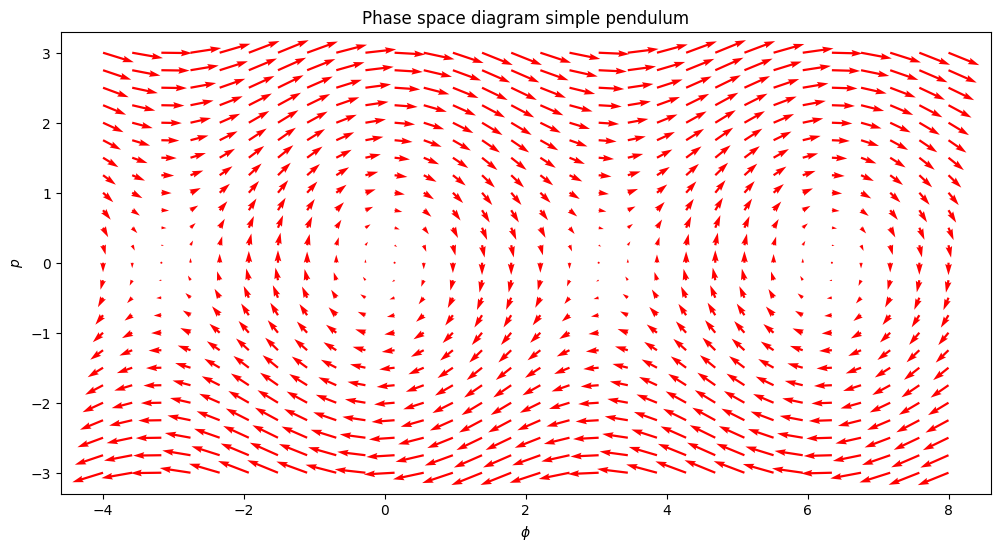

In [27]:
fig1,ax1=plt.subplots(figsize=(12,6))
ax1.quiver(Q,PQ,dot_Q,dot_PQ,color='r')
ax1.set_xlabel(r'$\phi$')
ax1.set_ylabel(r'$p$')
plt.title('Phase space diagram simple pendulum')

Phase space diagram, version 2

Text(0.5, 1.0, 'Phase space diagram simple pendulum')

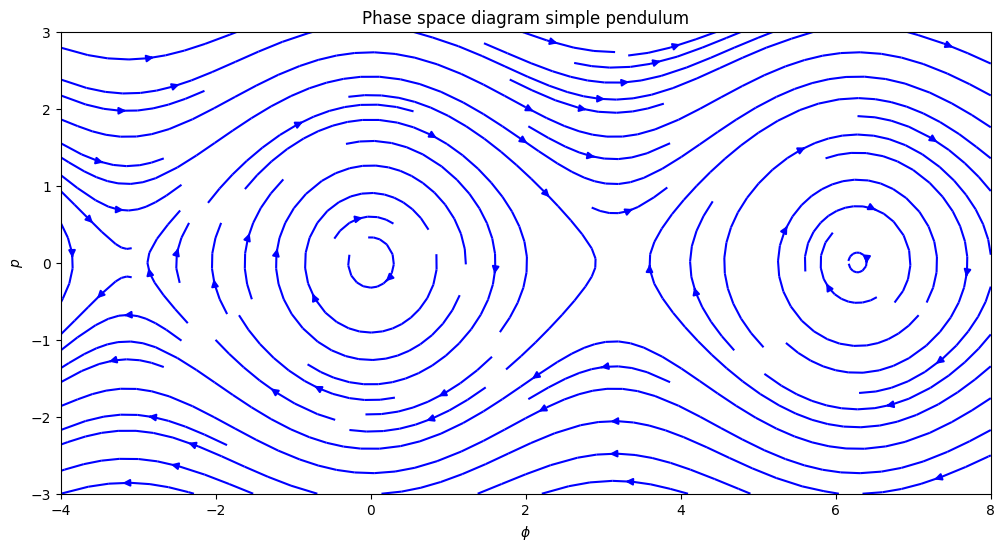

In [28]:
fig2,ax2=plt.subplots(figsize=(12,6))
ax2.streamplot(Q,PQ,dot_Q,dot_PQ,color='b')
ax2.set_xlabel(r'$\phi$')
ax2.set_ylabel(r'$p$')
plt.title('Phase space diagram simple pendulum')

## Numerical solution to the canonical equations

In [29]:
from scipy.integrate import odeint

Time frame

In [31]:
t0,tmax,dt=0.0,20.0,0.01 # Initial time, final time, time step (s)
time=np.arange(t0,tmax+dt,dt)

In [32]:
S0=[np.pi/4,1.0] #Initial conditions
answer=odeint(derivatives,S0,time)

In [33]:
answer

array([[ 0.78539816,  1.        ],
       [ 0.82469615,  0.96467595],
       [ 0.86255515,  0.92806831],
       ...,
       [-1.23906189,  0.25595061],
       [-1.22789844,  0.30219154],
       [-1.21488922,  0.34823308]])

In [34]:
S0=[-np.pi,2.0] #Initial conditions
answer=odeint(derivatives,S0,time)

Text(0.5, 1.0, 'Phase space diagram simple pendulum')

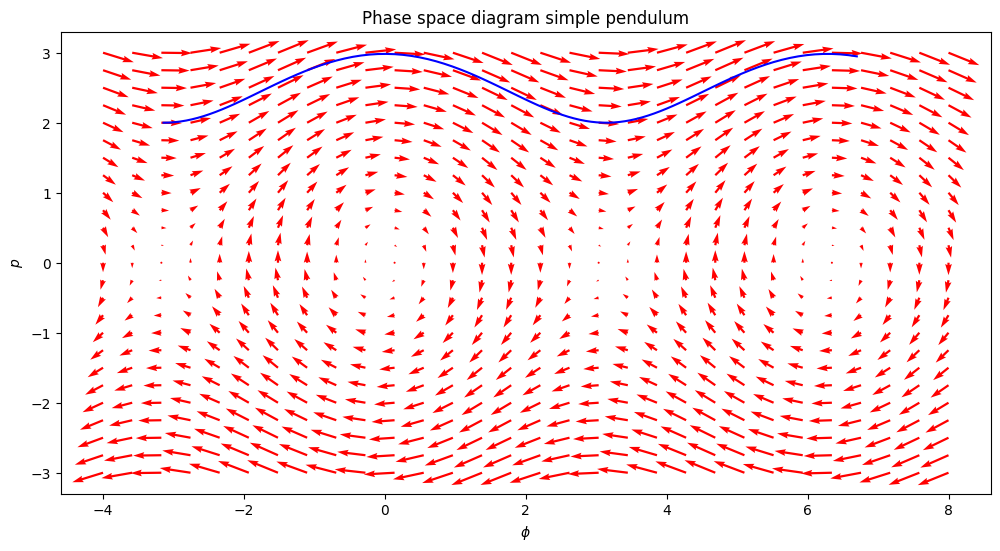

In [37]:
fig3,ax3=plt.subplots(figsize=(12,6))
ax3.plot(answer[:100,0],answer[:100,1],'b')
ax3.quiver(Q,PQ,dot_Q,dot_PQ,color='r')
ax3.set_xlabel(r'$\phi$')
ax3.set_ylabel(r'$p$')
plt.title('Phase space diagram simple pendulum')